In [24]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from myutils import Helpers as h
from myutils import Complexity_Measures as cm
from myutils import Datasets as ds
import math

#Magic Command, so changes in myutils module are reloaded
%load_ext autoreload
%autoreload 1
%aimport myutils


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
data = ds.get_all_data()

In [101]:
for dataset in data:
    print(dataset, data[dataset]["x_train"].shape)

ALL_NUMBERS (60000, 28, 28)
SIX_AND_NINES (11867, 28, 28)
ONLY_SIXES (5918, 28, 28)
RANDOM (60000, 28, 28)
SAMEPICTURE (60000, 28, 28)


In [102]:
for dataset in data:
    data[dataset]["x_train"] = data[dataset]["x_train"][:5918]
    data[dataset]["x_train"] = data[dataset]["x_train"] / 255


In [103]:
for dataset in data:
    print(dataset, data[dataset]["x_train"].shape)


ALL_NUMBERS (5918, 28, 28)
SIX_AND_NINES (5918, 28, 28)
ONLY_SIXES (5918, 28, 28)
RANDOM (5918, 28, 28)
SAMEPICTURE (5918, 28, 28)


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model


In [58]:
latent_dim = int((28*28)/2)


class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [105]:
for dataset in data:

    data_train = data[dataset]["x_train"]

    autoencoder = Autoencoder(latent_dim)
    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

    print("fitting dataset",dataset)
    hist = autoencoder.fit(data_train, data_train,
                        epochs=1,
                        batch_size=1,
                        shuffle=False)
    data[dataset]["loss"] = hist.history['loss'][0] * 100




fitting dataset ALL_NUMBERS
5918/5918 [==============================] - 10s 2ms/step - loss: 0.0160
fitting dataset SIX_AND_NINES
5918/5918 [==============================] - 11s 2ms/step - loss: 0.0132
fitting dataset ONLY_SIXES
5918/5918 [==============================] - 12s 2ms/step - loss: 0.0121
fitting dataset RANDOM
5918/5918 [==============================] - 12s 2ms/step - loss: 0.0835
fitting dataset SAMEPICTURE
5918/5918 [==============================] - 11s 2ms/step - loss: 2.6329e-04


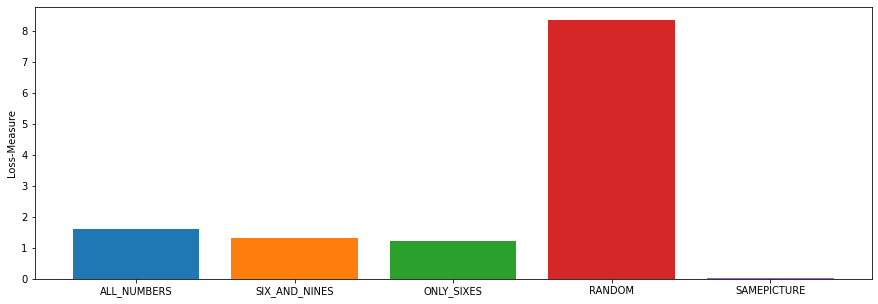

In [108]:
plt.figure(figsize=(15, 5))
for dataset in data:
    plt.bar(dataset, data[dataset]["loss"])
plt.ylabel("Loss-Measure")
plt.show()